# Graphing the number of favorites to @infinite_scream over time
By R. Stuart Geiger (@staeiou), Released CC-BY 4.0 & MIT License

## Setup
### Installing dependencies

In [1]:
!pip install tweepy pandas seaborn 

### Importing libraries

In [2]:
import random
import twitter_login  # a file containing my API keys
import tweepy

import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns
import datetime
import pytz

### Authenticate with Twitter

In [3]:
CONSUMER_KEY = twitter_login.CONSUMER_KEY
CONSUMER_SECRET = twitter_login.CONSUMER_SECRET
ACCESS_TOKEN = twitter_login.ACCESS_TOKEN
ACCESS_TOKEN_SECRET = twitter_login.ACCESS_TOKEN_SECRET

# Authenticate

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

## Getting the tweets
This is limited to the last ~3200 tweets from the API. :(

In [4]:
# by yanofsky, https://gist.github.com/yanofsky/5436496

screen_name="infinite_scream"

#initialize a list to hold all the tweepy Tweets
alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name,count=200)

#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print("...%s tweets downloaded so far" % (len(alltweets)))

getting tweets before 831526977425244160
...400 tweets downloaded so far
getting tweets before 831256667815809024
...600 tweets downloaded so far
getting tweets before 830993458416480255
...800 tweets downloaded so far
getting tweets before 830738254546796543
...1000 tweets downloaded so far
getting tweets before 830496665807224833
...1200 tweets downloaded so far
getting tweets before 830230937506033663
...1400 tweets downloaded so far
getting tweets before 829991863016906751
...1600 tweets downloaded so far
getting tweets before 829750490921574401
...1800 tweets downloaded so far
getting tweets before 829525298915979264
...2000 tweets downloaded so far
getting tweets before 829350354269700096
...2200 tweets downloaded so far
getting tweets before 829118824632967168
...2400 tweets downloaded so far
getting tweets before 828944962318434303
...2600 tweets downloaded so far
getting tweets before 828653039527612415
...2800 tweets downloaded so far
getting tweets before 828382733705560063


## Data processing
First, go through all the tweets and pull out a few key variables, putting it into a two-dimensional array.

In [5]:
tweets = [[tweet.id_str, tweet.created_at, tweet.favorite_count, tweet.retweet_count,\
           tweet.favorite_count + tweet.retweet_count, tweet.in_reply_to_screen_name is not None,\
           tweet.text, len(tweet.text)] for tweet in alltweets]

Convert to a pandas DataFrame for easy processing

In [6]:
tweets_df = pd.DataFrame.from_dict(tweets)

In [7]:
tweets_df.columns = ["id_str", "created_at", "favorite_count", "retweet_count", "fav_rt_count", \
                     "is_reply", "tweet_text", "tweet_length"]

Peek into this dataframe, pulling out rows 1000 to 1005

In [8]:
tweets_df[1000:1005]

,id_str,created_at,favorite_count,retweet_count,fav_rt_count,is_reply,tweet_text,tweet_length
1000,830496665798897667,2017-02-11 19:20:09,0,0,0,True,@Little__Fa AAAAAAAAAAAAHHHHHHHHHHH,35
1001,830495399777542145,2017-02-11 19:15:07,0,0,0,True,@Little__Fa AAAAAAAAAAAAAAAAAAAAH,33
1002,830495399777538049,2017-02-11 19:15:07,4,1,5,True,@soheilinho AAAAHHHHHHHHHHHHHHHH,32
1003,830495399764967430,2017-02-11 19:15:07,4,1,5,True,@amo_nikotin AAAAAAAAAHHHH,26
1004,830495176862875648,2017-02-11 19:14:14,18,4,22,False,AAAAAAAAAAAAAAAAAAAHHHHHHHH,27


Filter out tweets that were replies to specific users.

In [9]:
tweets_noreplies_df = tweets_df[tweets_df['is_reply'] == False]


Time is in UTC / GMT-0 from the API, convert to US/Pacific

In [10]:
fav_count = tweets_noreplies_df.set_index("created_at")["favorite_count"]
fav_count = fav_count.tz_localize(pytz.utc).tz_convert(pytz.timezone('US/Pacific'))
fav_count[0:10]

created_at
2017-02-14 19:44:14-08:00    20
2017-02-14 19:34:15-08:00    31
2017-02-14 19:24:14-08:00    42
2017-02-14 19:14:14-08:00    40
2017-02-14 19:04:14-08:00    20
2017-02-14 18:54:14-08:00    29
2017-02-14 18:44:14-08:00    58
2017-02-14 18:34:15-08:00    14
2017-02-14 18:24:15-08:00    39
2017-02-14 18:14:15-08:00    33
Name: favorite_count, dtype: int64

## Visualization

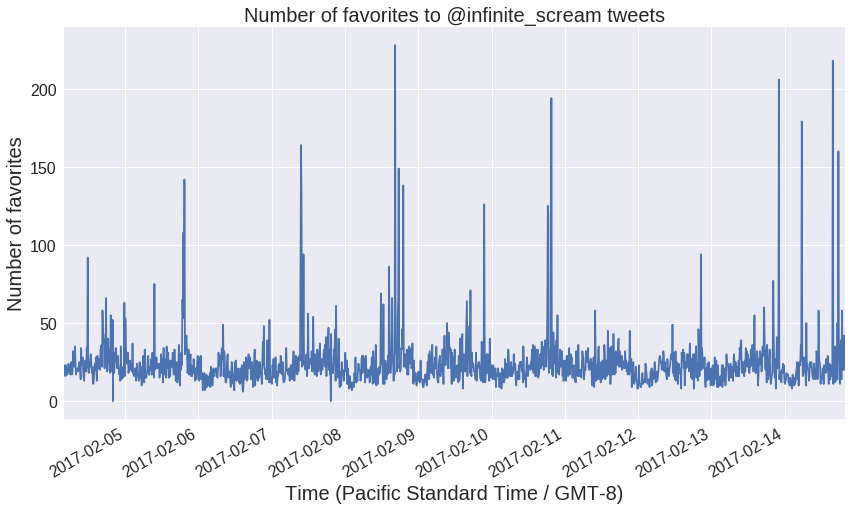

In [11]:
ax = fav_count.plot(figsize=[14,8], fontsize=16)
ax.set_title("Number of favorites to @infinite_scream tweets", {"fontsize":20})
ax.set_ylabel("Number of favorites", {"fontsize":20})
ax.set_xlabel("Time (Pacific Standard Time / GMT-8)", {"fontsize":20})

## Output to file

In [12]:
tweets_df.index.name = "tweet_num"
tweets_df.to_csv("infinite_scream.csv")
tweets_df.to_json("infinite_scream.json")

In [13]:
!head infinite_scream.csv

tweet_num,id_str,created_at,favorite_count,retweet_count,fav_rt_count,is_reply,tweet_text,tweet_length
0,831710686493474816,2017-02-15 03:44:14,20,13,33,False,AAAAAAAAAAAAAAAAAHHHHHHHHHHHHHH,31
1,831709655852318721,2017-02-15 03:40:09,0,0,0,True,@BcwGaming AAAAAAAHHHHHHHHHHH,29
2,831708391173214210,2017-02-15 03:35:07,1,0,1,True,@cake_cartel AAAAAAAAAAAAAAAAAAAHHHHHHHH,40
3,831708391168942080,2017-02-15 03:35:07,0,0,0,True,@josemarquez AAAAAAAAAAAAHH,27
4,831708391164805120,2017-02-15 03:35:07,1,0,1,True,@lipsetthistory AAAAAAAAAAAAAAAAHHHHHHHHHH,42
5,831708391164801025,2017-02-15 03:35:07,0,0,0,True,@WomenCanSee AAAAAAAAAAAAAAAAHHHHHH,35
6,831708391164743680,2017-02-15 03:35:07,0,0,0,True,@WeKilledGaming AAAAAAAAAAAAHHHHHHHHHHHHHHH,43
7,831708391160610822,2017-02-15 03:35:07,1,0,1,True,@OnlyMeIsMe AAAAAAAAAHHHHHHH,28
8,831708171806842880,2017-02-15 03:34:15,31,15,46,False,AAH,3
